##Using mothur- pairwise.seqs

In [172]:
! tail data/otusn.pick.fasta

>OTU.38673
TTACCGAGTGCGGGTCCCCCGGGGCCCAACCTCCCACCCGTGTTGACCGACCCCTGTTGCTTCGGCGGGCCCGCCTGGGCTTTCCGCCTCGGCCGCCGGGGGGCTTAGCCCCCGGGTCCGCGCCCGCCGAAGACCCCCTGAACGCTGCCTTGAAGGTTGCCGTCTGAGTGATAAATCAATCATTAAAACTTTCAACAACGGATCTCTTGGTTCCGGC
>OTU.38679
TTAAAGAGTGTAATAACTCCCAAACCCATGTGAACATACCTCATGTTGCCTCGGCAGGTCGCGCCTCCCTCGTAGGCCCTACCCCGTAGGCTCCTACGCGGAAGGCGCGGGTACCCCTGCCGGTGGCCCACGAAACTCTGTCTCATCGTTGAATTCTGAACCTATAACTAAATAAGTTAAAACTTTCAACAACGGATCTCTTGGTTCTGGC
>OTU.38691
TTACCTAGAGTTGTAGGCTTTGCCTGCTATCTCTTACCCATGTCTTTTGAGTACCTTACGTTTCCTCGGTGGGTTCGCCCACCGATTGGACAAATTTAAACCCTTTGCAGTTGAAATCAGCGTCTGAAAAAACTTAATAGTTACAACTTTCAACAACGGATCTCTTGGTTCTGGC
>OTU.38842
TTATTGAATAAATCTGAAGCGGTTGTAGCTGTCTCTCCGGAGAATGTGCACGCCCTTCACCTTTATCTTTCCACCTGTGCACACACTGTAGTCCTGGATACCTCTCGTCGAAAGGCGGATGCAGGGTTTGCTGTGACTTCGCAAGAAGGCCGGCTTACCCTGAATTTCCAGGTCTATGATCTCACACACCCCAAACTGAATGTTACAGAATGTTATCATCAGGCTTCGTGCCTATAAATTTATACAACTTTCAGCAACGGATCTCTTGGCTCTCGC
>OTU.38847
TTACAGAGTTGCAAAACTCCCTAAACCATTGTGAACGTTACCTAAACCGTTGCTTCGGCGGG

In [45]:
! grep -c ">" data/otusn.pick.fasta

1664


In [2]:
! head data/finalQC.fasta

>D3013.24_0
TTCATAATCAAAGTGTTTTTATGGCACTTTTAAAAAAATCCATATCCACCTTGTGTGCAATGTCATCTCACTGGAGGCCAGCTGGCTGTCAAAAGCCCGTTTGGTCACCTTTGGGATTTATATCTACTCAGAACTTTAGTGATTTTGTCTGAAAAATATTATGAATAACTTAATTCAAAATACAACTTTCAACAACGGATCTCTTGGCTCTCGC
>D1412.20_1
TTAACACTAATCCACACACTACTCAACCTAGCCTTTAGTTGCAGCCGAGGTGTTCGCCGTCAGGCAGCGCCGCAGCAGCAACCACAACAAACCTAATCTCAAAGGACTTTAACTAAGCCTTACCACAAAACCAAATTCTCAACGATGGATATCTTGGTTCCCAT
>D1412.18_2
TTACCGAGTTTACACCTCCCAAACCCCTGTGAACATACCTTAATGTTGCCTCGGCGGATCAGCCCGCGCCCCGTAAAACGGGACGGCCCGCCAGAGGACCCAAACTCTAATGTTTCTTATTGTAACTTCTGAGTAAAACAAACAAATAAATCAAAACTTTCAACAACGGATCTCTTGGTTCTGGC
>D3012.10_3
TTACAGAGTTGCAAAACTCCCTAAACCATTGTGAACGTTACCTAAACCGTTGCTTCGGCGGGCGGCCCCGGGGTTCTCCCCGGGAGCCCCCGGGCCCCATCCCGGGCGCCCGCCGGAGTTCACCAAACTATTGATAATTTAGGGCCTCTCTGAGTCTTCTGTACCGAATAAGTCAAAACTTTCAACAACGGATCTCTTGGTTCTGGC
>D713.15_4
TTACAGAGTTGCAAAACTCCCTAAACCATTGTGAACGTTACCTAAACCGTTGCTTCGGCGGGCGGCCCCGGGGTTTACCCCCCGGGCGCCCCTGGGCCCCACCGCGGGCGCCCGCCGGAGGTCACCAAACTCTTGATAATTTATGGCCTCTCTGAGTCTTCTGTACT

In [3]:
! grep -c ">" data/otusn.pick.fasta

2032


In [90]:
%%bash
mothur "#pairwise.seqs(fasta=data/otusn.pick.fasta, calc=onegap, countends=false, \
processors=10, output=square)" > /dev/null


In [ ]:
%%bash
ionice -c2 -n3 \
mothur "#cluster(column=data/finalQC.unique.dist, name=data/finalQC.names)" 

In [51]:
!tail data/otusn.pick.square.dist | cut -c1-80

OTU.38525 	0.382	0.3652	0.3588	0.375	0.3539	0.4202	0.3876	0.3846	0.3315	0.3815	0
OTU.38542 	0.3267	0.3235	0.3708	0.3122	0.3266	0.4388	0.3107	0.3846	0.3315	0.3242
OTU.38601 	0.3387	0.2356	0.3556	0.2396	0.2461	0.3077	0.2304	0.3387	0.2283	0.2983
OTU.38602 	0.2333	0.244	0.3611	0.2275	0.233	0.3833	0.2212	0.3465	0.2172	0.2932	0
OTU.38623 	0.1836	0.1805	0.3436	0.1731	0.1782	0.4	0.1796	0.3682	0.2362	0.3333	0.
OTU.38673 	0.3349	0.3024	0.3953	0.3175	0.3202	0.3462	0.3382	0.2857	0.367	0.3867	
OTU.38679 	0.2798	0.2778	0.3785	0.2864	0.2817	0.3077	0.2811	0.4009	0.2412	0.3046
OTU.38691 	0.3778	0.4078	0.4111	0.3757	0.3785	0.4096	0.4101	0.388	0.3825	0.3851	
OTU.38842 	0.4378	0.446	0.4035	0.4444	0.4554	0.3892	0.4314	0.4118	0.4241	0.4035	
OTU.38847 	0.1106	0.09184	0.3155	0.07895	0.1066	0.3077	0.05699	0.3692	0.2827	0.3


In [4]:
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [5]:
%matplotlib inline

In [6]:
dist_lines = open("data/otusn.pick.square.dist").readlines()
def line2array(line):
    line = line.rstrip()
    return np.array(map(float, line.split("\t")[1:]))
distmat = np.vstack([line2array(line) for line in dist_lines[1:]])

In [7]:
def getOTU(line):
    line = line.rstrip()
    return np.array(line.split("\t")[0:1])
OTU= np.vstack(getOTU(line) for line in dist_lines[1:])

In [8]:
print OTU

[['OTU.1     ']
 ['OTU.2     ']
 ['OTU.3     ']
 ..., 
 ['OTU.38691 ']
 ['OTU.38842 ']
 ['OTU.38847 ']]


In [9]:
print distmat

[[ 0.       0.108    0.392   ...,  0.3778   0.4378   0.1106 ]
 [ 0.108    0.       0.3077  ...,  0.4078   0.446    0.09184]
 [ 0.392    0.3077   0.      ...,  0.4111   0.4035   0.3155 ]
 ..., 
 [ 0.3778   0.4078   0.4111  ...,  0.       0.4438   0.3807 ]
 [ 0.4378   0.446    0.4035  ...,  0.4438   0.       0.4433 ]
 [ 0.1106   0.09184  0.3155  ...,  0.3807   0.4433   0.     ]]


In [10]:
model = TSNE(n_components=2, random_state=0)
tsne_coords = model.fit_transform(distmat) 

In [11]:
tsne_coords

array([[ 21.06082777,  10.67477769],
       [ 20.14986542,   8.40174618],
       [ -5.81421669,   9.54535495],
       ..., 
       [-18.22646644,  -2.68950209],
       [ -7.00346614, -19.17495262],
       [ 14.45666095,  13.83090067]])

In [12]:
combo = np.concatenate((tsne_coords, OTU), axis = 1)

In [13]:
combo

array([['21.060827775', '10.674777692', 'OTU.1     '],
       ['20.1498654222', '8.4017461809', 'OTU.2     '],
       ['-5.81421669462', '9.54535494554', 'OTU.3     '],
       ..., 
       ['-18.2264664371', '-2.68950208721', 'OTU.38691 '],
       ['-7.00346614498', '-19.174952619', 'OTU.38842 '],
       ['14.4566609536', '13.8309006697', 'OTU.38847 ']], 
      dtype='|S32')

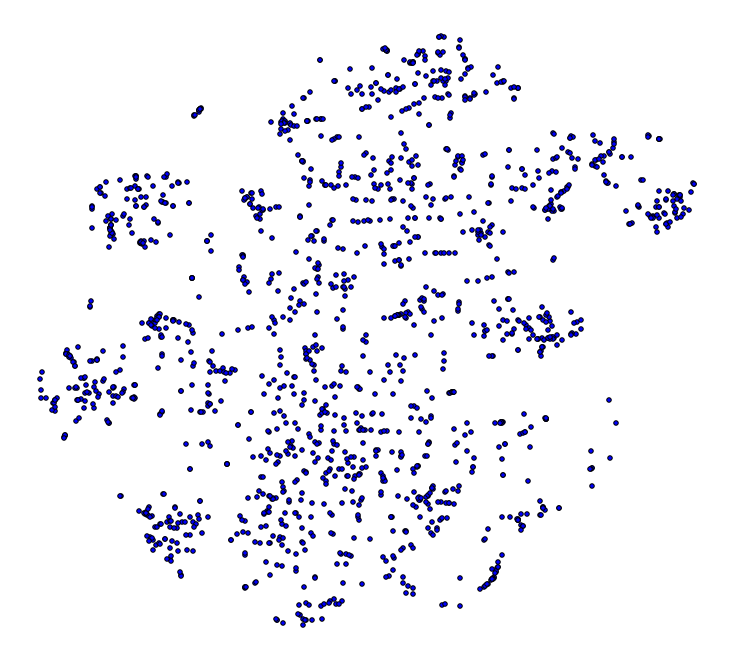

In [14]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(frameon=False)
plt.setp(ax, xticks=(), yticks=())
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=0.9,
                wspace=0.0, hspace=0.0)
plt.scatter(combo[:, 0], combo[:, 1])

In [15]:
%load_ext rpy2.ipython

In [16]:
%%R
library(phyloseq)
library(ggplot2)
library(foreach)
library(doParallel)
library(gridExtra)
library(vegan)
library(plyr); library(dplyr)
library(RColorBrewer)
library(stats)
library(reshape2)

foreach: simple, scalable parallel programming from Revolution Analytics
Use Revolution R for scalability, fault tolerance and more.
http://www.revolutionanalytics.com
Loading required package: iterators
Loading required package: parallel
Loading required package: grid
Loading required package: permute
Loading required package: lattice
This is vegan 2.2-1

Attaching package: ‘dplyr’

The following objects are masked from ‘package:plyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:stats’:

    filter

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [17]:
%Rpush combo

In [18]:
%%R
colnames(combo) = c("tsne_1", "tsne_2", "OTU")

In [19]:
%%R
combo = as.data.frame(combo)

In [20]:
%%R
head(combo)

          tsne_1         tsne_2        OTU
1   21.060827775   10.674777692 OTU.1     
2  20.1498654222   8.4017461809 OTU.2     
3 -5.81421669462  9.54535494554 OTU.3     
4   20.629537499  10.8728638955 OTU.4     
5  19.2721136191  9.02739585319 OTU.5     
6  13.2286215485 -15.3639428835 OTU.6     


In [21]:
%%R
combo$OTU = gsub(" ", "", combo$OTU, fixed = TRUE)

In [22]:
%%R
head(combo)

          tsne_1         tsne_2   OTU
1   21.060827775   10.674777692 OTU.1
2  20.1498654222   8.4017461809 OTU.2
3 -5.81421669462  9.54535494554 OTU.3
4   20.629537499  10.8728638955 OTU.4
5  19.2721136191  9.02739585319 OTU.5
6  13.2286215485 -15.3639428835 OTU.6


In [23]:
%%R
sample.md = read.table("data/Metadata_fungi.txt", 
                comment.char = "",
                header = TRUE,
                colClasses = c("Density" = "numeric"))
rownames(sample.md) = as.character(sample.md[, 1])

sample.md = sample_data(sample.md)

In [24]:
%%R
physeq = import_biom("data/otu_table_wtax.biom")
print(physeq)
sample.data = import_qiime_sample_data("data/Metadata_fungi.txt")
physeq = merge_phyloseq(physeq,sample.data)
print(physeq)
physeq.md = sample_data(physeq)
physeq.fungi = prune_samples((physeq.md$Treatment %in% c("12CCPS","13CCPS"))& 
                             (physeq.md$SampleID != c("D312.6")),  physeq)
physeq.fungi.prune = prune_samples(sample_sums(physeq.fungi) > 5360, physeq.fungi)
print (physeq.fungi.prune)
physeq.fungi.snorm = transform_sample_counts(physeq.fungi.prune, function(x) x/sum(x))
physeq.fungi.thresh = filter_taxa(physeq.fungi.snorm, function(x) sum(x > 0) / length(x) > (0.25), TRUE)
#physeq.fungi.thresh.min = filter_taxa(physeq.fungi.thresh, function(x) sum(x) > 5000, TRUE)
#physeq.fungi.thresh = filter_taxa(physeq.SIP.snorm, function(x) sum(x > 0) > (0.25 * length(x)), TRUE)
print(physeq.fungi.thresh)

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 2032 taxa and 173 samples ]
tax_table()   Taxonomy Table:    [ 2032 taxa by 7 taxonomic ranks ]
phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 2032 taxa and 173 samples ]
sample_data() Sample Data:       [ 173 samples by 9 sample variables ]
tax_table()   Taxonomy Table:    [ 2032 taxa by 7 taxonomic ranks ]
phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 2032 taxa and 162 samples ]
sample_data() Sample Data:       [ 162 samples by 9 sample variables ]
tax_table()   Taxonomy Table:    [ 2032 taxa by 7 taxonomic ranks ]
phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 600 taxa and 162 samples ]
sample_data() Sample Data:       [ 162 samples by 9 sample variables ]
tax_table()   Taxonomy Table:    [ 600 taxa by 7 taxonomic ranks ]


In [25]:
%%R
mdf= tbl_df(psmelt(physeq.fungi.thresh))

In [26]:
%%R
d = left_join(mdf, combo)

Joining by: "OTU"


In [27]:
%%R
head(d)

Source: local data frame [6 x 21]

    OTU   Sample Abundance SampleID Primers       i2       i1 Day  Density
1 OTU.1  D1413.6 0.4184204  D1413.6      27 tagcgagt actcactg  14 1.751536
2 OTU.1  D1413.7 0.3972463  D1413.7      28 ctgcgtgt actcactg  14 1.744979
3 OTU.1  D1413.8 0.3724805  D1413.8      29 tcatcgag actcactg  14 1.751536
4 OTU.1  D1413.9 0.3598390  D1413.9      30 cgtgagtg actcactg  14 1.735145
5 OTU.1 D1413.10 0.3580522 D1413.10      31 ggatatct actcactg  14 1.729681
6 OTU.1 D1413.11 0.3521933 D1413.11      32 gacaccgt actcactg  14 1.725310
Variables not shown: Treatment (fctr), Mock_Comm (fctr), RNA_DNA (fctr), Rank1
  (fctr), Rank2 (fctr), Rank3 (fctr), Rank4 (fctr), Rank5 (fctr), Rank6 (fctr),
  Rank7 (fctr), tsne_1 (fctr), tsne_2 (fctr)


In [28]:
%%R
d = select(d, OTU, Sample, Day, tsne_1, tsne_2, Density, Rank1, Rank2, Rank3, Treatment)

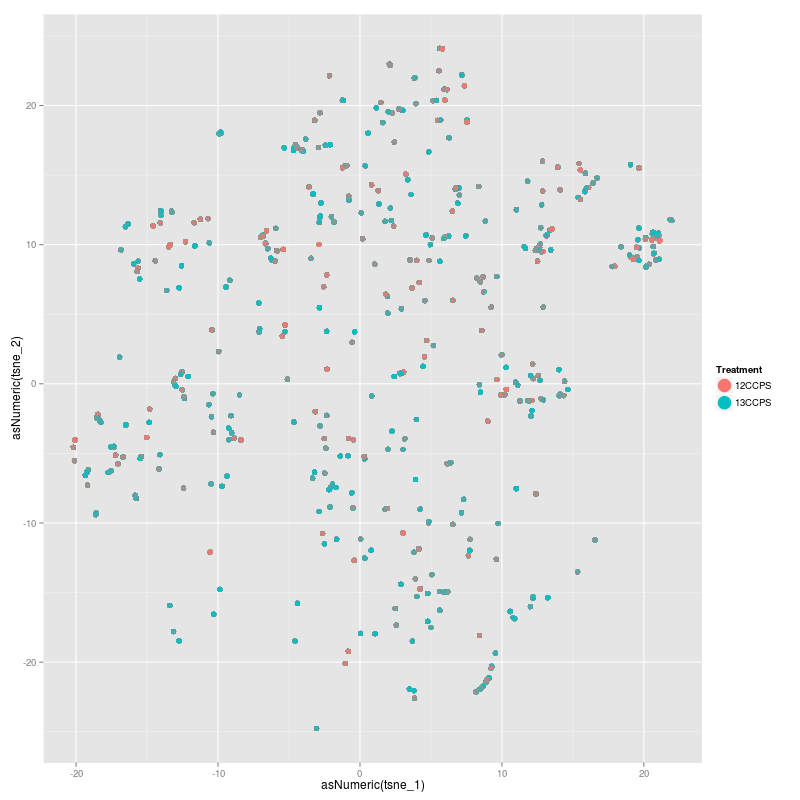

In [29]:
%%R -w 800 -h 800

asNumeric = function(x) { as.numeric(as.character(x)) }
p = ggplot(d, aes(x = asNumeric(tsne_1), y = asNumeric(tsne_2)))+
    geom_point(aes(fill = Treatment, color = Treatment, alpha = 0.85), pch = 21) +
    guides(alpha = FALSE, fill=guide_legend(override.aes=list(size=6))) + labs(size = "Density") 


p      

In [30]:
%%R
l2fc = read.csv("data/l2fc.csv", header = TRUE, sep = ",")

In [31]:
%%R
head(l2fc)

  Day    OTU log2FoldChange     lfcSE    Rank1         Rank2              Rank3
1   3 OTU.40     -1.7995959 0.3482440 k__Fungi p__Ascomycota c__Sordariomycetes
2   3  OTU.7      2.7460387 0.4049920 k__Fungi p__Ascomycota c__Sordariomycetes
3   3  OTU.5     -0.3195079 0.5060621 k__Fungi p__Ascomycota c__Sordariomycetes
4   3  OTU.3     -0.3862363 0.3147093 k__Fungi p__Ascomycota c__Sordariomycetes
5   3 OTU.16      0.4177197 0.2757979 k__Fungi p__Ascomycota               <NA>
6   3 OTU.11     -1.5514248 0.3555538 k__Fungi p__Ascomycota c__Sordariomycetes
              Rank4                   Rank5           Rank6
1    o__Hypocreales          f__Nectriaceae     g__Fusarium
2    o__Sordariales        f__Chaetomiaceae   g__Chaetomium
3    o__Sordariales        f__Chaetomiaceae     g__Humicola
4 o__Incertae_sedis f__Plectosphaerellaceae            <NA>
5              <NA>                    <NA>            <NA>
6 o__Incertae_sedis f__Plectosphaerellaceae g__Verticillium
                    

In [32]:
%%R
d2 = left_join(l2fc, d)

Joining by: c("Day", "OTU", "Rank1", "Rank2", "Rank3")


In [34]:
%%R
head(d2)

  Day    OTU log2FoldChange    lfcSE    Rank1         Rank2              Rank3
1   3 OTU.40      -1.799596 0.348244 k__Fungi p__Ascomycota c__Sordariomycetes
2   3 OTU.40      -1.799596 0.348244 k__Fungi p__Ascomycota c__Sordariomycetes
3   3 OTU.40      -1.799596 0.348244 k__Fungi p__Ascomycota c__Sordariomycetes
4   3 OTU.40      -1.799596 0.348244 k__Fungi p__Ascomycota c__Sordariomycetes
5   3 OTU.40      -1.799596 0.348244 k__Fungi p__Ascomycota c__Sordariomycetes
6   3 OTU.40      -1.799596 0.348244 k__Fungi p__Ascomycota c__Sordariomycetes
           Rank4          Rank5       Rank6 Rank7 RNA_DNA sparsity p padj
1 o__Hypocreales f__Nectriaceae g__Fusarium  <NA>     DNA        1 1    1
2 o__Hypocreales f__Nectriaceae g__Fusarium  <NA>     DNA        1 1    1
3 o__Hypocreales f__Nectriaceae g__Fusarium  <NA>     DNA        1 1    1
4 o__Hypocreales f__Nectriaceae g__Fusarium  <NA>     DNA        1 1    1
5 o__Hypocreales f__Nectriaceae g__Fusarium  <NA>     DNA        1 1    1
6 o

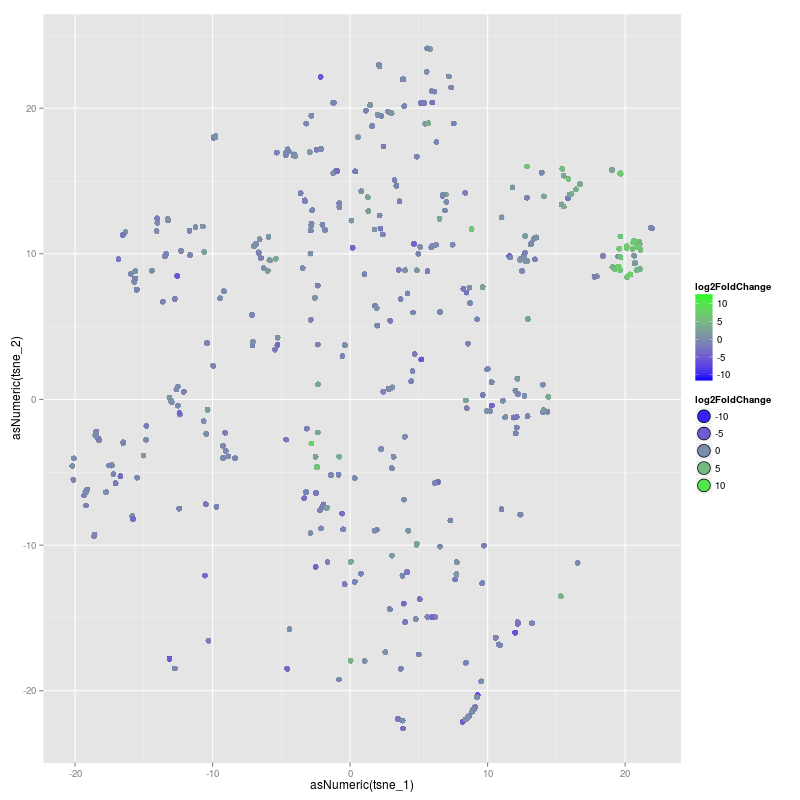

In [46]:
%%R -w 800 -h 800

my_palette <- colorRampPalette(c("red", "yellow", "green"))(n = 299)


asNumeric = function(x) { as.numeric(as.character(x)) }
p = ggplot(d2, aes(x = asNumeric(tsne_1), y = asNumeric(tsne_2)))+
    geom_point(aes(fill = log2FoldChange, color = log2FoldChange, alpha = 0.85), pch = 21) +
    guides(alpha = FALSE, fill=guide_legend(override.aes=list(size=6))) + labs(size = "Density")+
    scale_fill_gradient(low="blue",high="green") + scale_colour_gradient(low="blue",high="green") 


p     

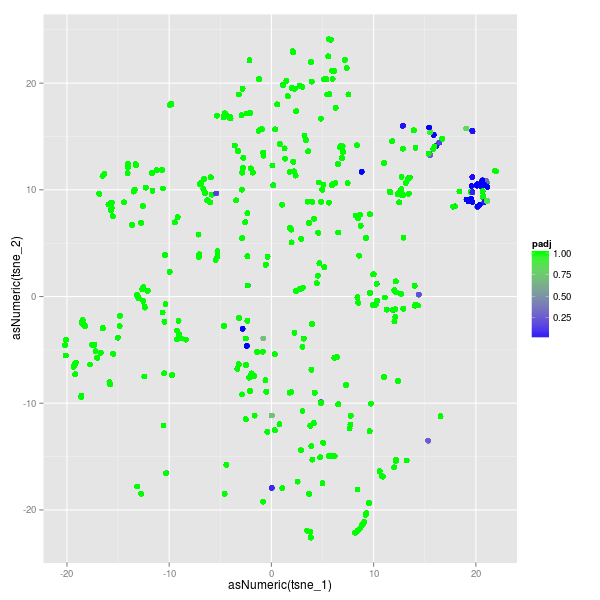

In [52]:
%%R -w 600 -h 600

my_palette <- colorRampPalette(c("red", "yellow", "green"))(n = 299)


asNumeric = function(x) { as.numeric(as.character(x)) }
p = ggplot(d2, aes(x = asNumeric(tsne_1), y = asNumeric(tsne_2)))+
    geom_point(aes(fill = padj, color = padj, alpha = 0.85), pch = 21) +
    guides(alpha = FALSE, fill=guide_legend(override.aes=list(size=6))) +
    scale_fill_gradient(low="blue",high="green") + scale_colour_gradient(low="blue",high="green") +
    guides(fill=FALSE)


p     

In [85]:
%%R
d3 =filter(d2, padj <=0.10)
d3$tsne_1 = asNumeric(d3$tsne_1)
d3$tsne_2 = asNumeric(d3$tsne_2)
d3 = filter(d3, tsne_1 > 19)
d3 = filter(d3, tsne_2 > 0)

In [86]:
%%R
length(d3$OTU)

[1] 2373
